Andhra Pradesh Turmeric Production Stationarity Test:
ADF Statistic: 1.234939
p-value: 0.996219

Odisha Turmeric Production Stationarity Test:
ADF Statistic: -0.485720
p-value: 0.894773

Testing Stationarity after Differentiating once (d=1)

Andhra Pradesh Turmeric Production Stationarity Test:
ADF Statistic: -12.999062
p-value: 0.000000

Odisha Turmeric Production Stationarity Test:
ADF Statistic: -1.721058
p-value: 0.420297


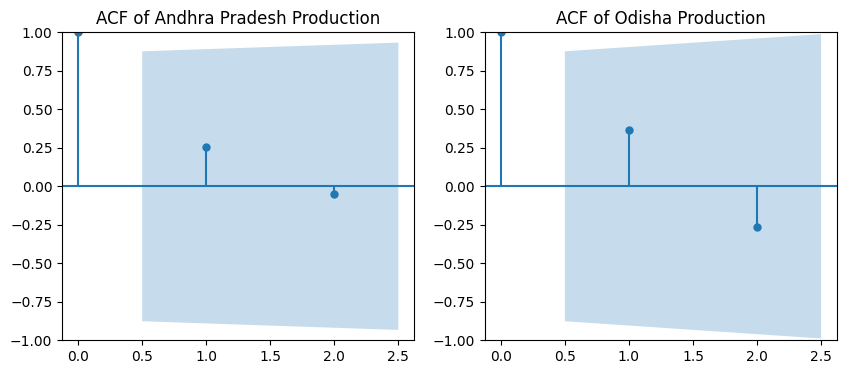

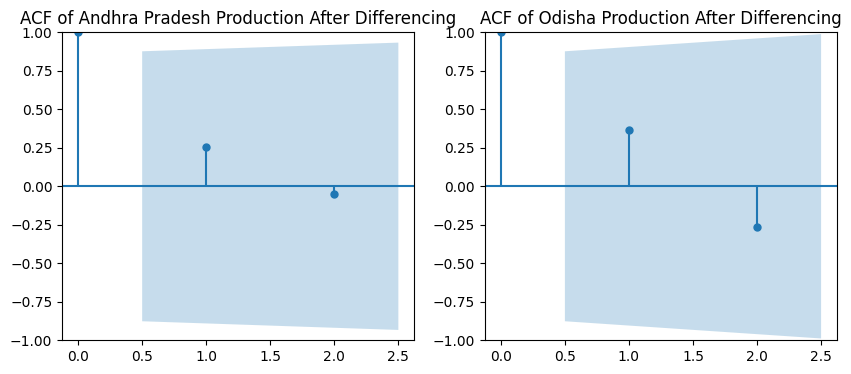

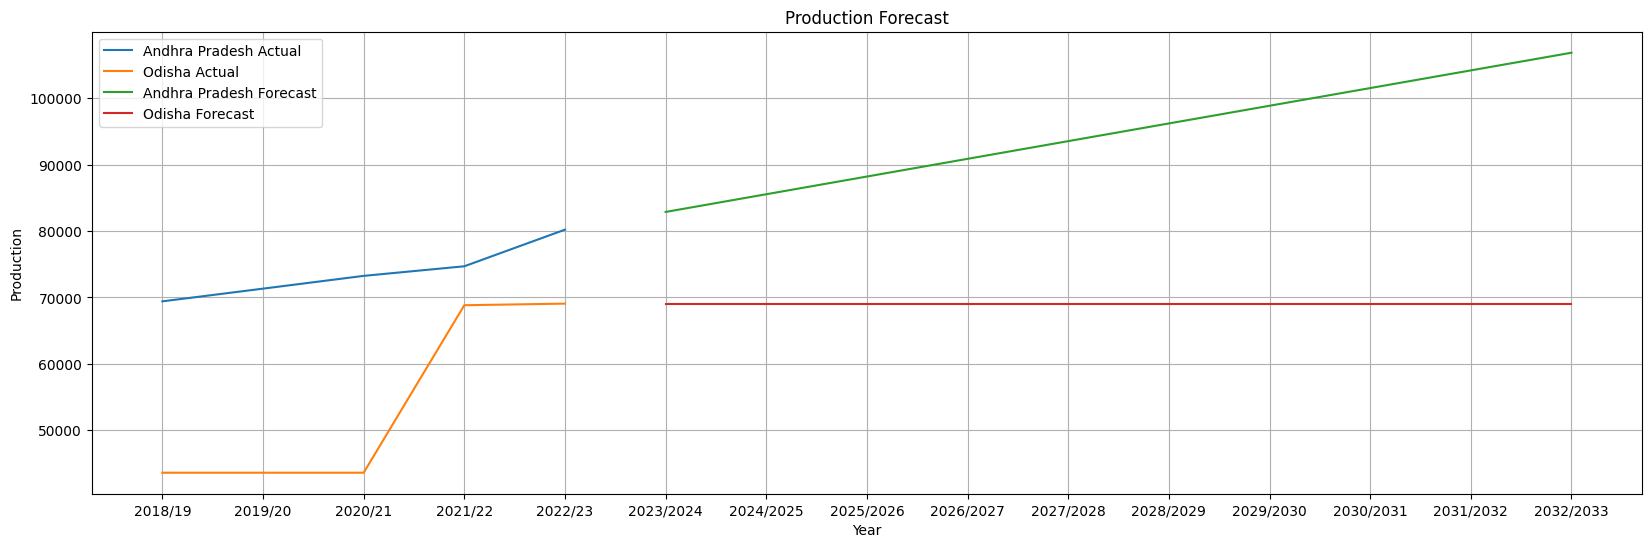

In [54]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load the dataset

data = {
    'Year': ['2018/19','2019/20', '2020/21', '2021/22', '2022/23'],
    'ANDHRA PRADESH': [ 69410,  71321,73244,74687,80199],
    'ORISSA': [ 43615,  43615,43615,68825,69065]
}

andhra_pradesh_production = pd.Series(data['ANDHRA PRADESH'], index=data['Year'])
odisha_production = pd.Series(data['ORISSA'], index=data['Year'])


# Define a function to test stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
   

# Test stationarity for each state
print("Andhra Pradesh Turmeric Production Stationarity Test:")
test_stationarity(andhra_pradesh_production)
print("\nOdisha Turmeric Production Stationarity Test:")
test_stationarity(odisha_production)
# Create a figure and a grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the ACF of Andhra Pradesh production in the first subplot
plot_acf(andhra_pradesh_production, ax=ax[0])
ax[0].set_title('ACF of Andhra Pradesh Production')

# Plot the ACF of Odisha production in the second subplot
plot_acf(odisha_production, ax=ax[1])
ax[1].set_title('ACF of Odisha Production')




# Both series are non-stationary, we need to differentiate the series
andhra_pradesh_production_diff = andhra_pradesh_production.diff().dropna()
odisha_production_diff = odisha_production.diff().dropna()

# Test stationarity for each state after Differentiating once (d=1)
print("\nTesting Stationarity after Differentiating once (d=1)")

print("\nAndhra Pradesh Turmeric Production Stationarity Test:")
test_stationarity(andhra_pradesh_production_diff)
print("\nOdisha Turmeric Production Stationarity Test:")
test_stationarity(odisha_production_diff)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the ACF of Andhra Pradesh production in the first subplot
plot_acf(andhra_pradesh_production, ax=ax[0])
ax[0].set_title('ACF of Andhra Pradesh Production After Differencing')

# Plot the ACF of Odisha production in the second subplot
plot_acf(odisha_production, ax=ax[1])
ax[1].set_title('ACF of Odisha Production After Differencing')


# Now from the ADF Statistic and p-value, we can see that both series are not stationary even after differencing once
# So we can safely assume that they have a unit root 
# In order to tackel this, we can use ARIMA model to forecast the production

# You would need to determine p, d, q using ACF and PACF plots
# Here we assume p=1, d=1, q=1 for demonstration purposes

# Fit ARIMA model for Andhra Pradesh
arima_ap = ARIMA(andhra_pradesh_production, order=(1, 1, 1))
arima_ap_fit = arima_ap.fit()

# Fit ARIMA model for Odisha
arima_odisha = ARIMA(odisha_production, order=(1, 1, 1))
arima_odisha_fit = arima_odisha.fit()

# Forecasting with ARIMA model
ap_forecast = arima_ap_fit.forecast(steps=10)  # Forecast next 5 periods
odisha_forecast = arima_odisha_fit.forecast(steps=10)

# Create new index for the forecasted data
last_year = int(data['Year'][-1][:4])
new_index = [f'{i}/{i+1}' for i in range(last_year+1, last_year+11)]

# Assign the new index to the forecasted data
ap_forecast.index = new_index
odisha_forecast.index = new_index

# Plot the forecasts
plt.figure(figsize=(20, 6))
plt.plot(andhra_pradesh_production.index, andhra_pradesh_production, label='Andhra Pradesh Actual')
plt.plot(odisha_production.index, odisha_production, label='Odisha Actual')
plt.plot(ap_forecast.index, ap_forecast, label='Andhra Pradesh Forecast')
plt.plot(odisha_forecast.index, odisha_forecast, label='Odisha Forecast')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Production Forecast')
plt.grid(True)
plt.legend()
plt.show()


## Autocorrelation Analysis and Forecasting Approach

Upon conducting an autocorrelation analysis, the resulting graph indicates non-stationarity within the dataset. This is evidenced by the pronounced spike at lag 0 in the scatter plot section of the graph, which signifies a strong correlation of the data with itself at the same point in time. Such a pattern is indicative of a non-stationary time series that may possess a unit root.

The histogram portion of the graph further supports this conclusion, displaying a distribution of autocorrelation values that deviates from normality, with a skew to the left. This skewness suggests that the standard assumptions for many statistical models may not hold for this dataset.

In an effort to achieve stationarity, differencing was applied to the data. However, the results were mixed. For Andhra Pradesh, the p-value post-differencing dropped to 0, suggesting that the differencing was effective in removing non-stationarity. Conversely, for Odisha, the p-value remained above the 0.05 threshold even after differencing, indicating persistent non-stationarity.

Given these outcomes, the ARIMA (Autoregressive Integrated Moving Average) model is recommended for forecasting. ARIMA models are particularly adept at handling non-stationary data, including those with unit roots, by integrating autoregressive terms and moving average terms. These components work in tandem to model the linear relationships between the current data points and their predecessors, making ARIMA an ideal choice for forecasting this dataset.
